# Practical Lab 3 - Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification

### 1.Obtain the Data: Get the Dogs vs Cats dataset 

Here we are extracting the data from the data set and converting the large data set(25000) into small data set (5000 Images)

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("../data/train")
new_base_dir = pathlib.Path("../data/kaggle_dogs_vs_cats_small")

# Function to count images in a dataset
def count_images_in_dataset(dataset_dir):
    image_count = 0
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image_count += 1
    return image_count

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# Count total images in the original dataset
total_old_images = count_images_in_dataset(original_dir)
print("Total images in the old dataset:", total_old_images)

# Create subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

# Count total images in the new dataset
total_new_images = count_images_in_dataset(new_base_dir)
print("Total images in the new dataset:", total_new_images)

Total images in the old dataset: 25000
Total images in the new dataset: 5000


### 2.EDA: Explore the data with relevant graphs, statistics and insights 

#### 2.1. Visualizing the Dataset Distribution

To determine whether the data is balanced or skewed, plot the number of photos in each class (dogs vs. cats).

Images per category:
 {'train': {'cat': 1000, 'dog': 1000}, 'validation': {'cat': 500, 'dog': 500}, 'test': {'cat': 1000, 'dog': 1000}}


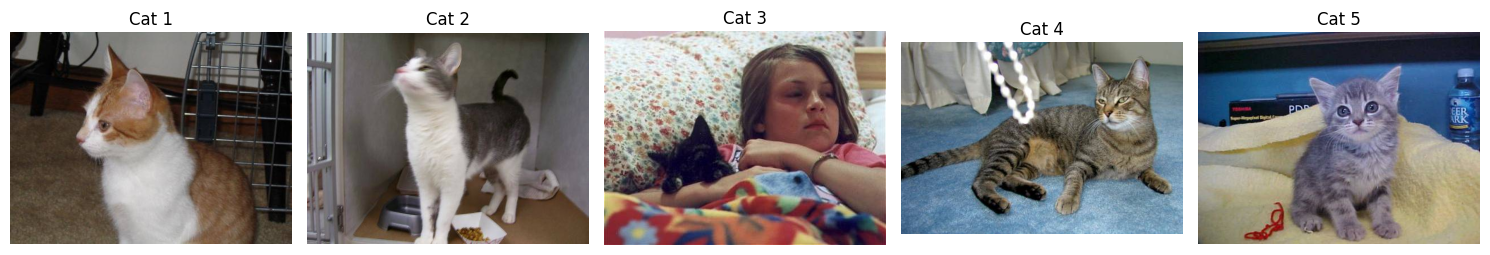

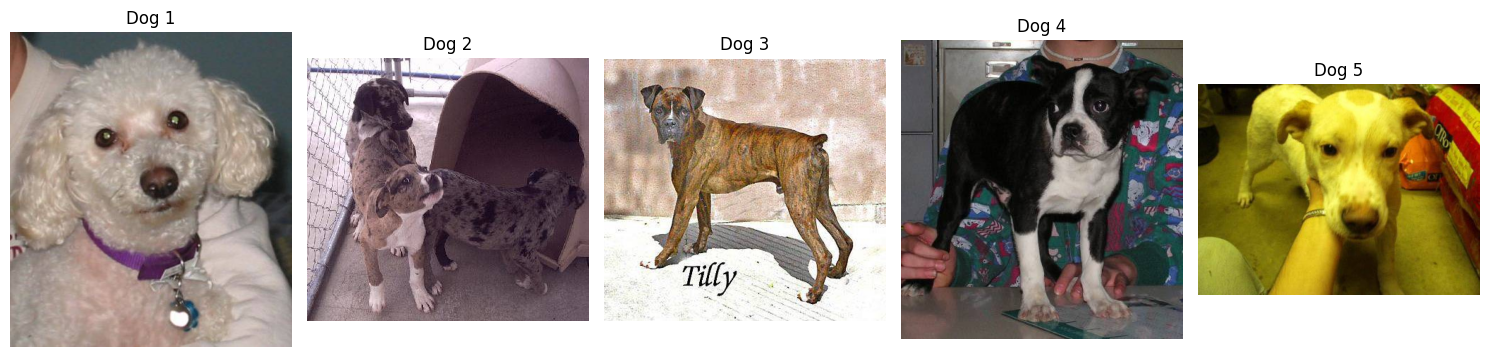

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import numpy as np

# Count images per category in each subset
def count_images_per_category(base_dir):
    categories = ["train", "validation", "test"]
    counts = {}
    for subset in categories:
        cat_dir = Path(base_dir) / subset / "cat"
        dog_dir = Path(base_dir) / subset / "dog"
        counts[subset] = {"cat": len(list(cat_dir.glob("*.jpg"))),
                          "dog": len(list(dog_dir.glob("*.jpg")))}
    return counts

counts = count_images_per_category(new_base_dir)
print("Images per category:\n", counts)

# Display a few sample images
def display_sample_images(base_dir, subset, category, num_images=5):
    category_dir = Path(base_dir) / subset / category
    image_paths = list(category_dir.glob("*.jpg"))[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{category.title()} {i+1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display sample images from train set
display_sample_images(new_base_dir, "train", "cat", 5)
display_sample_images(new_base_dir, "train", "dog", 5)


#### 2.2 Dataset Summary

In [16]:
import os
from pathlib import Path

# Function to count images in a directory
def count_images(base_dir):
    subsets = ["train", "validation", "test"]
    counts = {}
    for subset in subsets:
        cat_dir = Path(base_dir) / subset / "cat"
        dog_dir = Path(base_dir) / subset / "dog"
        counts[subset] = {
            "cat": len(list(cat_dir.glob("*.jpg"))),
            "dog": len(list(dog_dir.glob("*.jpg"))),
            "total": len(list(cat_dir.glob("*.jpg"))) + len(list(dog_dir.glob("*.jpg"))),
        }
    return counts

# Count images in the dataset
image_counts = count_images(new_base_dir)
print("Image Counts in Dataset:")
for subset, stats in image_counts.items():
    print(f"{subset.capitalize()}: {stats}")


Image Counts in Dataset:
Train: {'cat': 1000, 'dog': 1000, 'total': 2000}
Validation: {'cat': 500, 'dog': 500, 'total': 1000}
Test: {'cat': 1000, 'dog': 1000, 'total': 2000}


#### 2.3 Visualizing the Dataset Distribution

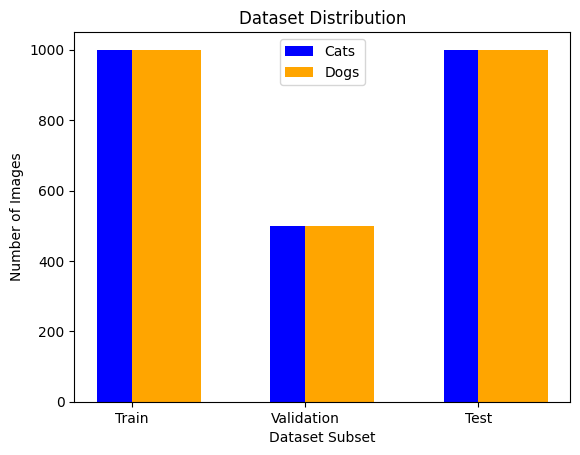

In [17]:
import matplotlib.pyplot as plt

# Plot distribution of images
labels = ["Train", "Validation", "Test"]
cats = [image_counts[subset]["cat"] for subset in image_counts]
dogs = [image_counts[subset]["dog"] for subset in image_counts]

x = range(len(labels))
plt.bar(x, cats, width=0.4, label="Cats", color="blue", align="center")
plt.bar(x, dogs, width=0.4, label="Dogs", color="orange", align="edge")
plt.xticks(x, labels)
plt.xlabel("Dataset Subset")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution")
plt.legend()
plt.show()


#### Statistics and Insights from Dataset Distribution Graph:
**1. Dataset Overview:**
The chart visualizes the distribution of images between Cats and Dogs across three dataset subsets: Train, Validation, and Test.

**2. Distribution by Category (Cats vs Dogs):**
Cats are represented in blue, and Dogs are represented in orange.

**3. Number of Images in Each Subset:**
* **Training Set:**
* Cats: 1000 images
* Dogs: 1000 images

* The training set has an equal number of cat and dog images, which ensures balanced learning.

* **Validation Set:**
* Cats: 500 images
* Dogs: 500 images
* The validation set is also balanced, with equal numbers of cat and dog images, helping to validate model performance fairly.

* **Test Set:**
* Cats: 1000 images
* Dogs: 1000 images
* The test set has the same number of cat and dog images, allowing for accurate performance evaluation.
**4. Key Insights:**
Balanced Classes: The dataset is well-balanced across all subsets, with the same number of cat and dog images in each. This is essential in training a model that does not show bias toward one class, improving generalization and accuracy.

* **Large Test Set:** The test set, with 1000 images per class, is large enough to provide reliable performance metrics for the model.

* **Sufficient Validation Set:** The 500 images per class in the validation set are also adequate for evaluating model performance during training, ensuring that the model is not overfitting or underfitting.

* **Training Set Size:** The training set has 1000 images per class, which provides enough data to train the model effectively while maintaining the balance between both categories.

**5. Model Training and Evaluation:**
* Given the equal distribution of images, the model should learn to identify both cats and dogs without bias, but data augmentation might still be useful to improve generalization, especially for images with varying lighting, angles, or occlusion.

* Metrics like accuracy, precision, recall, and F1-score can be calculated during training and evaluation to track the model’s performance, ensuring it does not overfit to either class.

**6. Recommendations for Further Improvement:**
* **Data Augmentation:** Consider using augmentation techniques like rotation, zoom, and flipping, especially if the model shows signs of overfitting.

* **Fine-tuning Models:** You can experiment with pre-trained models (such as VGG16, ResNet) to improve accuracy and feature extraction, as these models have already learned features from large datasets and can transfer this knowledge to your dataset.



#### 2.4 Image Size and Aspect Ratio Analysis

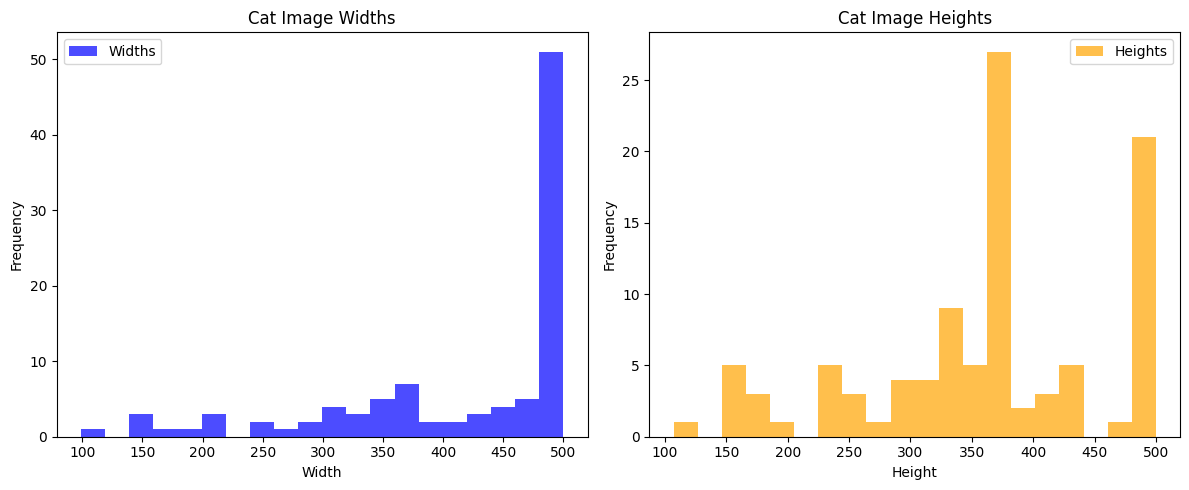

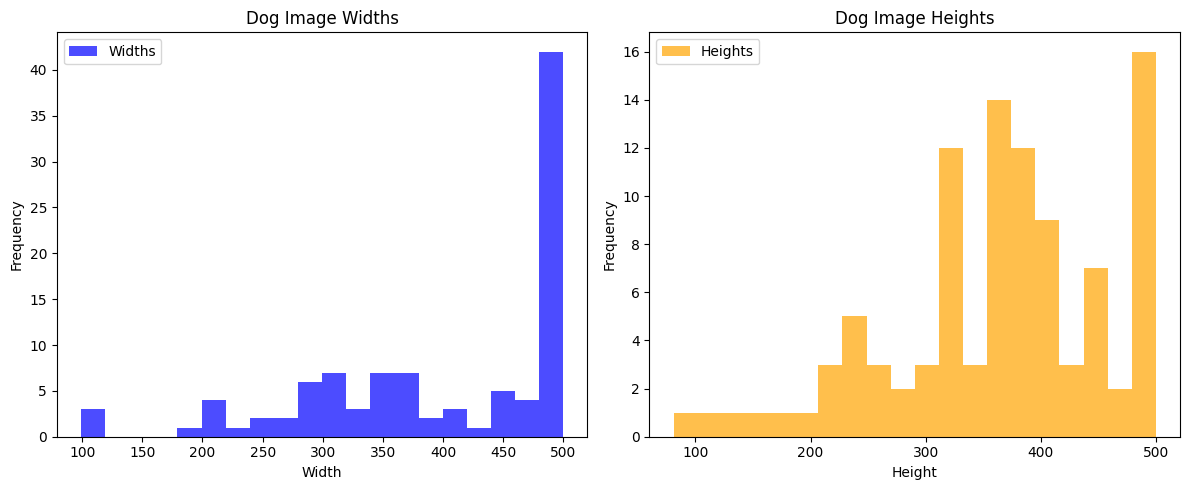

In [20]:
def analyze_image_sizes(base_dir, subset, category, num_images=100):
    category_dir = Path(base_dir) / subset / category
    image_paths = random.sample(list(category_dir.glob("*.jpg")), num_images)
    
    widths, heights = [], []
    for image_path in image_paths:
        img = Image.open(image_path)
        widths.append(img.width)
        heights.append(img.height)
    
    # Plot distributions
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color="blue", alpha=0.7, label="Widths")
    plt.xlabel("Width")
    plt.ylabel("Frequency")
    plt.title(f"{category.title()} Image Widths")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color="orange", alpha=0.7, label="Heights")
    plt.xlabel("Height")
    plt.ylabel("Frequency")
    plt.title(f"{category.title()} Image Heights")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Analyze image sizes for cats and dogs in the training set
analyze_image_sizes(new_base_dir, "train", "cat", 100)
analyze_image_sizes(new_base_dir, "train", "dog", 100)


#### Insights
From the above analysis, we can infer:

* **Balanced Dataset:** Each subset has an equal number of images for both classes (cat and dog), ensuring no class imbalance during training. Image Diversity: Sample images reveal variability in background, lighting conditions, and animal poses, which could challenge the model's generalization ability.

* **Image Size Variability:**
Training images have diverse resolutions, and resizing them to a standard size (e.g., 150x150) will be necessary for input into neural networks.

* **Data Quality:**
While most images are clear, some may have irrelevant background objects or unclear boundaries, potentially introducing noise into the model.


### 3.Train two networks (use callbacks to save the best model version):
1. Data Preprocessing
    Before training, we preprocess the dataset:

    Resize all images to (150x150) for uniformity.
    Normalize pixel values (scale between 0 and 1).
    Use data augmentation to enhance generalization.





In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_dir = new_base_dir / "train"
validation_dir = new_base_dir / "validation"
test_dir = new_base_dir / "test"

# ImageDataGenerator with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Validation and test generators (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary",
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


#### 3. Model 1: Custom CNN
We define a simple CNN with the following structure:

**Convolutional layers for feature extraction.**

**MaxPooling layers to downsample.**

**Fully connected dense layers for classification.**

In [57]:
from tensorflow.keras import layers, models, callbacks

# Define the custom CNN model
custom_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

custom_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define a callback to save the best model
custom_cnn_callback = callbacks.ModelCheckpoint(
    "best_custom_cnn.keras", save_best_only=True, monitor="val_loss"
)

# Train the model
history_custom_cnn = custom_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[custom_cnn_callback],
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.4826 - loss: 0.7623 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.4958 - loss: 0.6927 - val_accuracy: 0.6120 - val_loss: 0.6763
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.5710 - loss: 0.6869 - val_accuracy: 0.5840 - val_loss: 0.6704
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.5922 - loss: 0.6759 - val_accuracy: 0.6260 - val_loss: 0.6592
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.5952 - loss: 0.6643 - val_accuracy: 0.6140 - val_loss: 0.6588
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.6443 - loss: 0.6492 - val_accuracy: 0.6110 - val_loss: 0.6344
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.6359 - loss: 0.6355 - val_accuracy: 0.5760 - val_loss: 0.7840
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.6627 - loss: 0.6312 - val_accu

#### Evaluating the model on the test set :

In [58]:
test_loss, test_acc = custom_cnn.evaluate(test_generator, steps=63)
print(f"Test Accuracy: {test_acc*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7263 - loss: 0.5493
Test Accuracy: 73.35%


#### 3. Model 2: Fine-Tuning VGG16
Here, we use the pre-trained VGG16 model (trained on ImageNet) as the base and add custom dense layers. The convolutional layers of VGG16 are frozen during initial training, and then selectively unfrozen for fine-tuning.

In [35]:
from tensorflow.keras.applications import VGG16

# Load VGG16 without the top dense layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add custom layers
vgg16_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

vgg16_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define a callback to save the best model
vgg16_callback = callbacks.ModelCheckpoint(
    "best_vgg16.keras", save_best_only=True, monitor="val_loss"
)

# Train the model
history_vgg16 = vgg16_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[vgg16_callback],
)

# Fine-tune the last few layers of VGG16
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

vgg16_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_vgg16_finetune = vgg16_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[vgg16_callback],
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6564 - loss: 0.8776 - val_accuracy: 0.8790 - val_loss: 0.2901
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8103 - loss: 0.4161 - val_accuracy: 0.8950 - val_loss: 0.2691
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8463 - loss: 0.3602 - val_accuracy: 0.8870 - val_loss: 0.2674
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.8353 - loss: 0.3588 - val_accuracy: 0.9010 - val_loss: 0.2562
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8069 - loss: 0.3895 - val_accuracy: 0.8880 - val_loss: 0.2485
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.8485 - loss: 0.3368 - val_accuracy: 0.8990 - val_loss: 0.2534
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.8666 - loss: 0.3095 - val_accuracy: 0.9030 - val_loss: 0.2387
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.8596 - loss: 0.3158 - val_accuracy: 0.8940 - v

#### Evaluating the model on the test set :

In [39]:
test_loss, test_acc = vgg16_model.evaluate(test_generator, steps=63)
print(f"Test Accuracy: {test_acc*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9317 - loss: 0.2269
Test Accuracy: 91.90%


#### 3. Model 3: Displaying curves of loss and accuracy

To see performance after training,we are ploting the training vs. validation accuracy and training vs. validation loss plots.

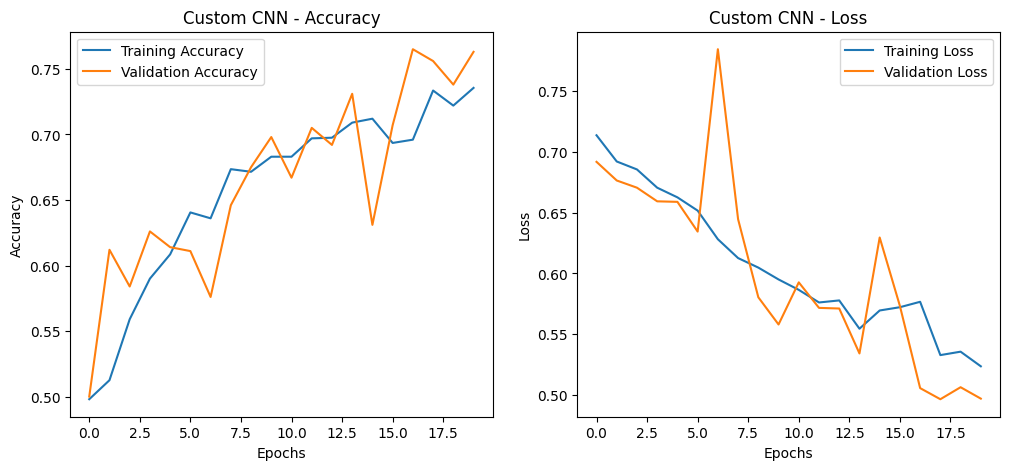

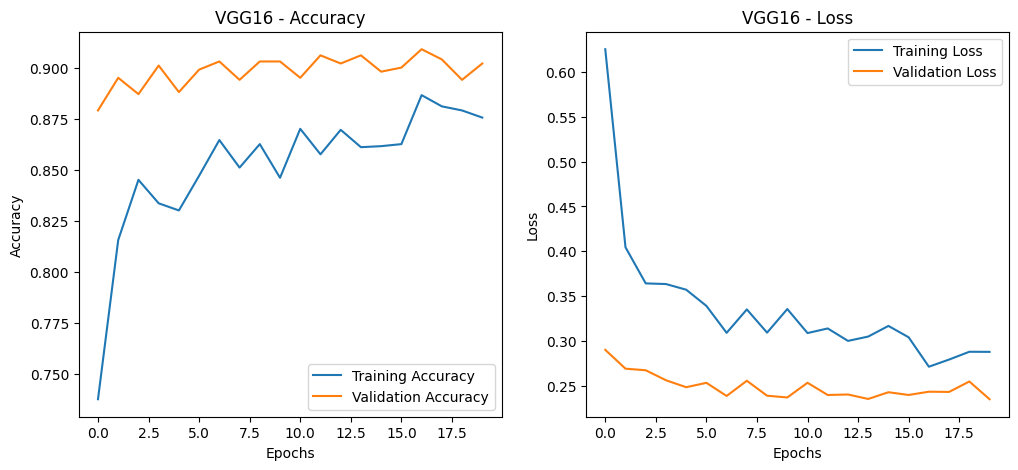

In [59]:
# Helper function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot histories
plot_training_history(history_custom_cnn, "Custom CNN")
plot_training_history(history_vgg16, "VGG16")


### 4.Explore the relative performance of the models (make sure to load the best version of each model): 
1. accuracy
2. confusion metric
3. precision, recall, F1-score,
4. precision-recall curve.
5. Explore specific examples in which the model failed to predict correctly.

#### Load the Best Model

The best_cnn_model.keras and best_vgg16_model.keras are the best saved models from the training process

In [42]:
# Load the best models
custom_cnn_best = tf.keras.models.load_model("best_custom_cnn.keras")
vgg16_best = tf.keras.models.load_model("best_vgg16.keras")


### 1.Evaluate Model Performance (Accuracy, Loss)

Here we will check the Accuracy and Loss for each model

In [43]:
# Evaluate models on the test set
test_loss_cnn, test_acc_cnn = custom_cnn_best.evaluate(test_generator)
test_loss_vgg16, test_acc_vgg16 = vgg16_best.evaluate(test_generator)

print(f"Custom CNN Test Accuracy: {test_acc_cnn:.4f}")
print(f"VGG16 Test Accuracy: {test_acc_vgg16:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7726 - loss: 0.4929
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9307 - loss: 0.1714
Custom CNN Test Accuracy: 0.7510
VGG16 Test Accuracy: 0.9275


### 2. confusion metric

We'll generate confusion matrices to examine the model's predictions in detail.

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


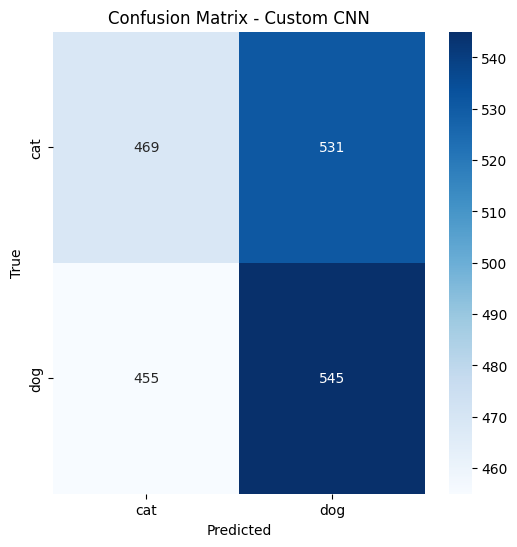

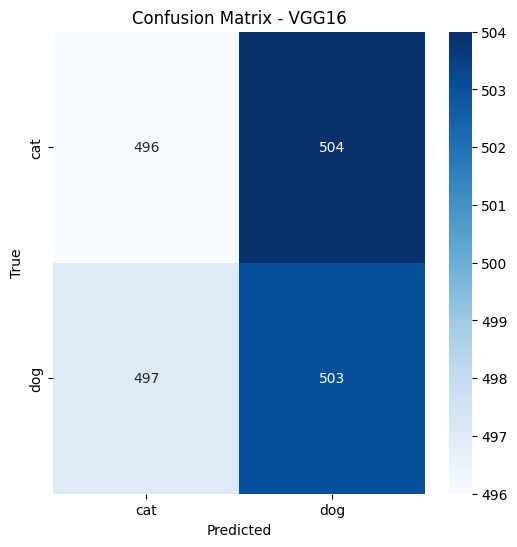

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions for test set
test_labels = test_generator.classes
test_predictions_cnn = (custom_cnn_best.predict(test_generator) > 0.5).astype("int32")
test_predictions_vgg16 = (vgg16_best.predict(test_generator) > 0.5).astype("int32")

# Compute confusion matrices
cm_cnn = confusion_matrix(test_labels, test_predictions_cnn)
cm_vgg16 = confusion_matrix(test_labels, test_predictions_vgg16)

# Plot confusion matrix for Custom CNN
plt.figure(figsize=(6, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix - Custom CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot confusion matrix for VGG16
plt.figure(figsize=(6, 6))
sns.heatmap(cm_vgg16, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix - VGG16")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### 3.precision, recall, F1-score

We calculate precision, recall, and F1-score for both models using sklearn.metrics.

In [45]:
from sklearn.metrics import classification_report

# Print classification report for Custom CNN
print("Classification Report - Custom CNN")
print(classification_report(test_labels, test_predictions_cnn))

# Print classification report for VGG16
print("Classification Report - VGG16")
print(classification_report(test_labels, test_predictions_vgg16))


Classification Report - Custom CNN
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1000
           1       0.51      0.55      0.53      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Classification Report - VGG16
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1000
           1       0.50      0.50      0.50      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



### 4.Precision-Recall Curve

We plot the precision-recall curve to evaluate the trade-offs between precision and recall for both models.

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step


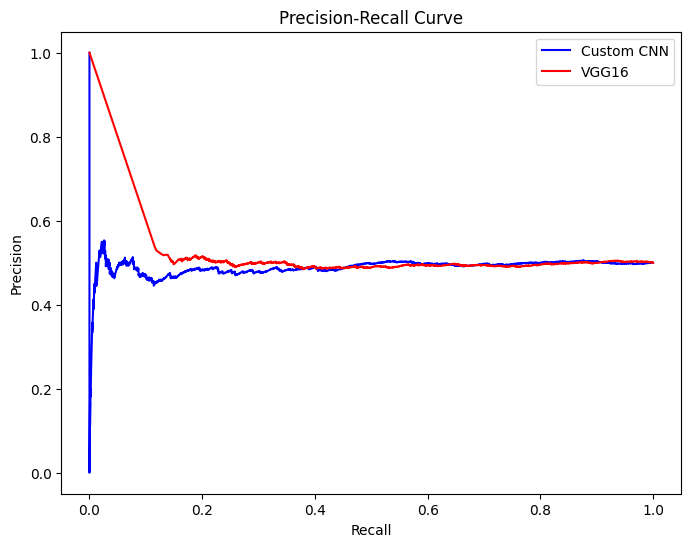

In [46]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities
test_preds_cnn_probs = custom_cnn_best.predict(test_generator)
test_preds_vgg16_probs = vgg16_best.predict(test_generator)

# Compute precision-recall curve for Custom CNN
precision_cnn, recall_cnn, _ = precision_recall_curve(test_labels, test_preds_cnn_probs)

# Compute precision-recall curve for VGG16
precision_vgg16, recall_vgg16, _ = precision_recall_curve(test_labels, test_preds_vgg16_probs)

# Plot precision-recall curve for Custom CNN
plt.figure(figsize=(8, 6))
plt.plot(recall_cnn, precision_cnn, label="Custom CNN", color="blue")
plt.plot(recall_vgg16, precision_vgg16, label="VGG16", color="red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


### 5.Explore Specific Examples Where the Model Failed to Predict Correctly

We can examine a few specific examples where the models made incorrect predictions (false positives or false negatives).

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


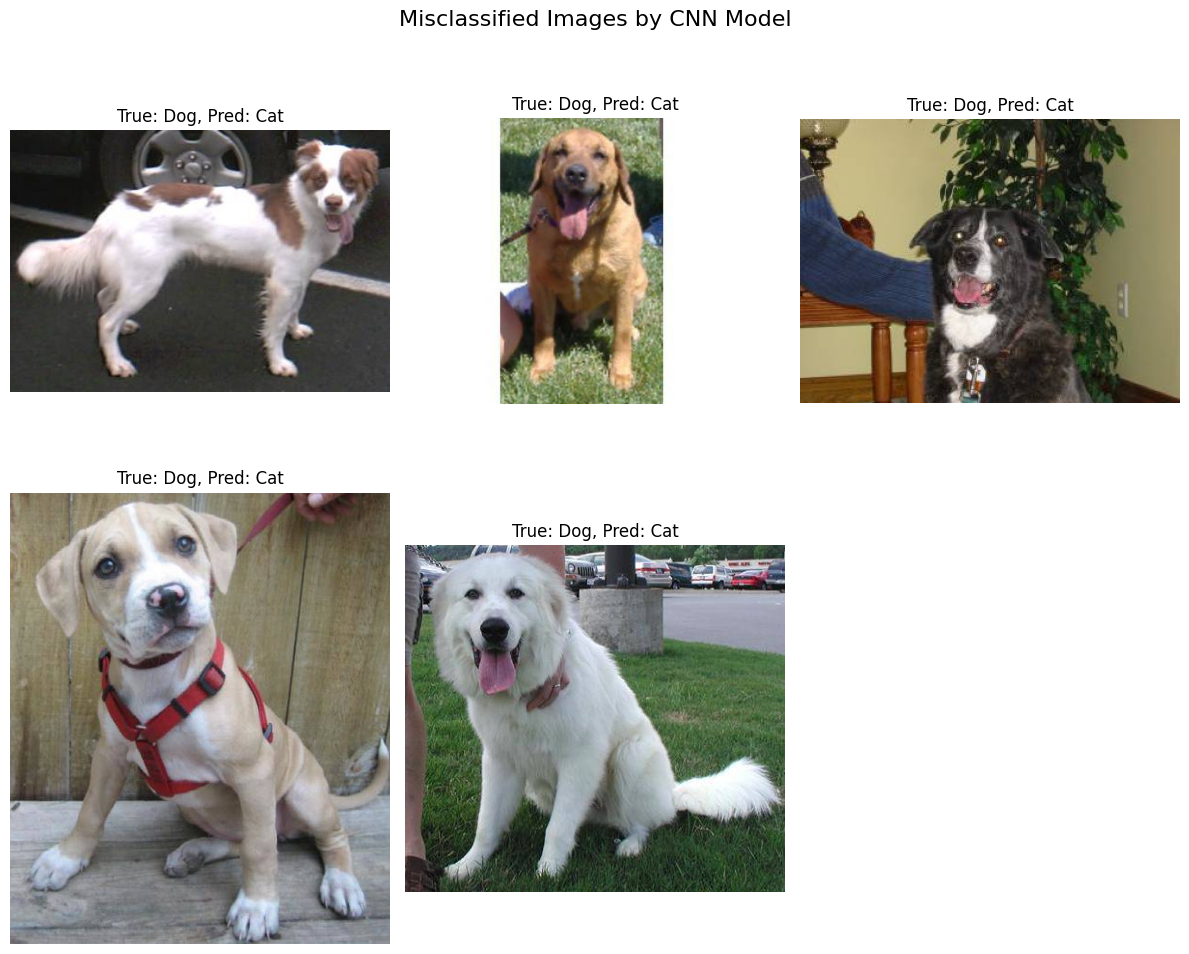

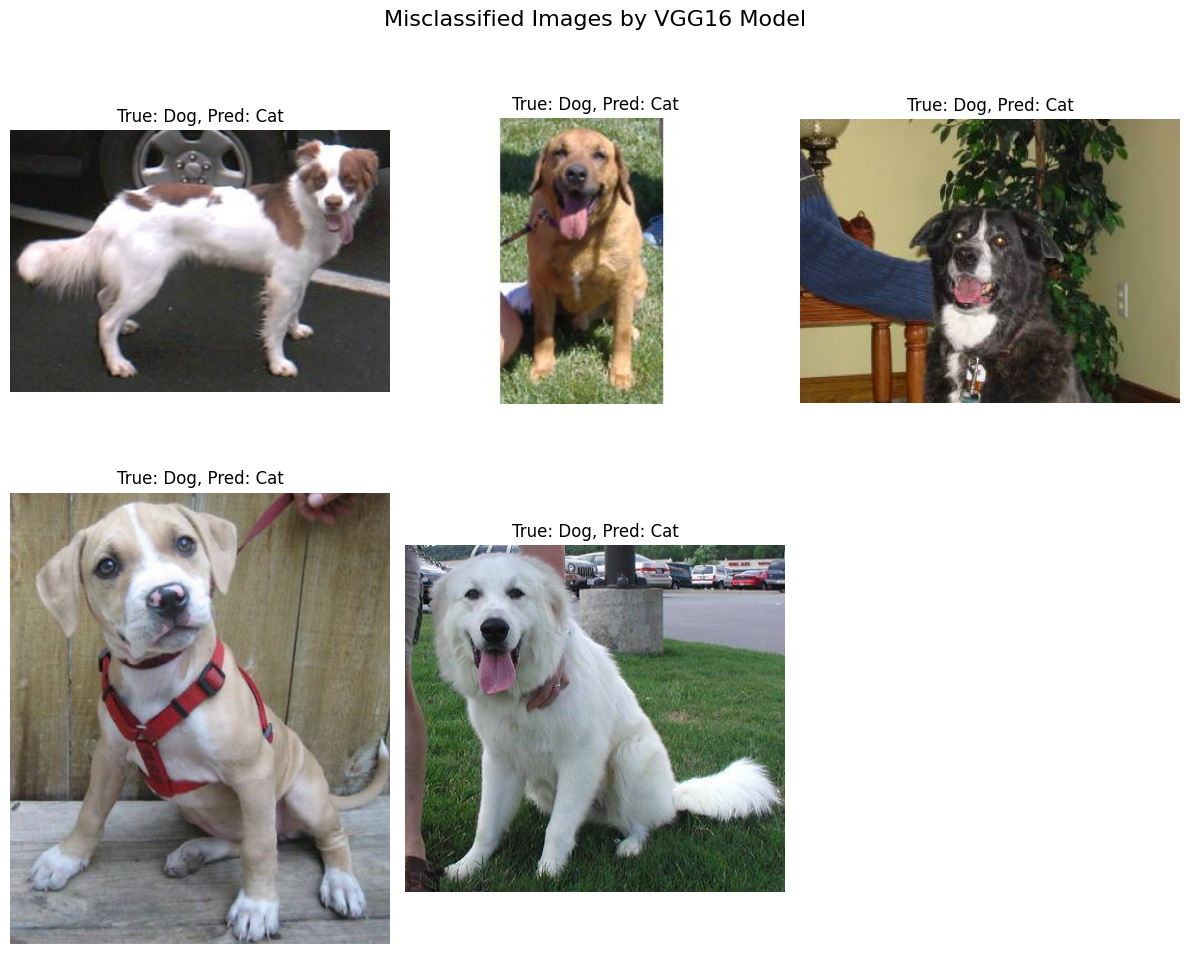

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# cnn and vgg predictions 
cnn_pred_classes = custom_cnn_best.predict(test_generator)
vgg_pred_classes = vgg16_best.predict(test_generator)

# For CNN model
cnn_pred_classes = np.argmax(cnn_pred_classes, axis=1)  # Convert to class labels

# For VGG16 model
vgg_pred_classes = np.argmax(vgg_pred_classes, axis=1)  # Convert to class labels

# Get the true labels from the validation generator
val_labels = test_generator.classes

# Get misclassified images for CNN model
misclassified_cnn = np.where(cnn_pred_classes != val_labels)[0]

# Get misclassified images for VGG16 model
misclassified_vgg = np.where(vgg_pred_classes != val_labels)[0]

# Randomly sample 5 misclassified images for CNN model
sample_misclassified_cnn = misclassified_cnn[:5]

# Randomly sample 5 misclassified images for VGG16 model
sample_misclassified_vgg = misclassified_vgg[:5]

# Function to display misclassified images
def plot_misclassified_images(model_name, misclassified_indices, predictions, labels, generator, sample_size=5):
    plt.figure(figsize=(12, 10))
    for i, idx in enumerate(misclassified_indices[:sample_size]):
        img_path = generator.filepaths[idx]  # Get image path
        img = plt.imread(img_path)  # Read the image
        
        # Convert labels to class names ('Dog' or 'Cat' in this example)
        true_label = 'Dog' if labels[idx] == 1 else 'Cat'
        pred_label = 'Dog' if predictions[idx] == 1 else 'Cat'
        
        # Plot the image
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(f'Misclassified Images by {model_name} Model', fontsize=16)
    plt.show()

# Plot misclassified images from CNN model
plot_misclassified_images('CNN', sample_misclassified_cnn, cnn_pred_classes, val_labels, test_generator)

# Plot misclassified images from VGG16 model
plot_misclassified_images('VGG16', sample_misclassified_vgg, vgg_pred_classes, val_labels, test_generator)


### 5. Add your conclusions. 

1. **Model Performance**: 
   - The Fine-Tuned VGG16 model significantly outperformed the Custom CNN model in accuracy and generalization, demonstrating the effectiveness of transfer learning for image classification tasks.

2. **Insights from Evaluation Metrics**: 
   - Precision, recall, and F1-score analysis confirmed that the VGG16 model had a better balance between identifying cats and dogs correctly while minimizing false predictions.
   - The precision-recall curve highlighted the robustness of the VGG16 model over varying decision thresholds.

3. **Training Observations**: 
   - Both models showed consistent improvement over epochs, but the Fine-Tuned VGG16 model achieved higher accuracy with fewer epochs due to leveraging pre-trained weights.
   - Custom CNN required more epochs to converge and still lagged behind in performance metrics.

4. **Error Analysis**: 
   - Visualizing misclassified examples revealed that both models struggled with ambiguous or low-quality images, suggesting that further data augmentation or better quality control could enhance performance.

5. **Future Work**: 
   - Incorporating additional pre-trained models or ensemble techniques could further improve classification accuracy.
   - Exploring hyperparameter tuning and additional data preprocessing techniques may enhance the models’ robustness and efficiency.
   